# **Heart Disease Prediction — Decision Tree vs Random Forest**

**IMPORTING LIBRARIES**

In [79]:
#Data Manipulation & Numerics
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML/Pre-processing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,RocCurveDisplay

# Reproducibilty
np.random.seed(42)

# Set Seaborn style/theme for all plots
sns.set_theme(style="whitegrid", palette="deep")

#display plots inline if using Jupyter/Colab
%matplotlib inline

**LOADING DATA**

## 📄 Exploratory Data Analysis (EDA) – Beautified Report

### **Purpose**
This section performs a **basic exploratory data analysis** on the `heart.csv` dataset to:
- Understand its **structure** (rows, columns, data types).
- Preview sample rows.
- Check for **missing values**.
- Get **statistical summaries**.
- Visualize **missing values** (heatmap).
- Show **target variable distribution** with percentage labels.

---

### **Code Enhancements**
Instead of plain text outputs, I used **color formatting** and **styled tables** to make the results more readable and visually appealing.

**Techniques used:**
- **`termcolor`** → To print **color-coded headings** in the terminal output.
- **`tabulate`** → To convert Pandas DataFrames into **beautifully formatted tables** in the console.
- **`seaborn` + `matplotlib`** → For **plots** with clear titles, modern color palettes, and annotated values.
- Added **emoji markers** (📏, 🔍, 📊, 💓) for better section separation.
- Applied **`viridis` palette** for colorblind-friendly visualizations.

---

### **Structure of this EDA**
1. **Dataset Shape** – Displays rows × columns count.
2. **First 5 Rows** – Quick data preview.
3. **Dataset Info** – Columns, non-null count, and data type.
4. **Statistical Summary** – Mean, median, standard deviation, etc.
5. **Missing Value Table** – Counts NaNs per column.
6. **Missing Values Heatmap** – Visual indicator for nulls.
7. **Target Distribution Plot** – Bar chart with percentage labels.

---

### **Acknowledgment**
💡 *Note:* This section was **beautified with AI assistance** (OpenAI ChatGPT) to enhance formatting and presentation style for both:
- **Evaluator readability**
- **My future notes/reference**

The core logic and data analysis remain **unchanged** — only the **display and formatting** were improved.

---



In [80]:

#df = pd.read_csv('heart.csv')

#print("rows and columns :- ",df.shape)
#print("==========================================================")
#print(df.head())
#print("==========================================================")
#print(df.info())
#print("==========================================================")
#print(df.describe())
#print("==========================================================")
#print("Missing values per column :- \n",df.isnull().sum())
#print("==========================================================")
#plt.figure(figsize=(8,4))
#sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Reds')
#plt.title("Missing Values Heatmap")
#plt.show()
#print("==========================================================")

#print("==========================================================")

# Target Distribution with percentages
#plt.figure(figsize=(8, 5))
#ax = sns.countplot(
 #   x=target_col,
  #  hue=target_col,        # Apply palette by hue
   # data=df,
    #palette="viridis",
    #legend=False           # Hide legend, same look as before
#)

# Add percentages above bars
#total = len(df)
#for p in ax.patches:
#    percentage = f'{100 * p.get_height()/total:.1f}%'
#    x = p.get_x() + p.get_width()/2
#    y = p.get_height()
#    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')

#plt.title(" Target Distribution", fontsize=16, fontweight='bold', color='purple')
#plt.xlabel("Heart Disease (0 = No, 1 = Yes)", fontsize=12)
#plt.ylabel("Count", fontsize=12)
#sns.despine()  # remove top & right borders
#plt.show()



 HEART DISEASE DATASET - EXPLORATORY DATA ANALYSIS 

📏 Dataset Shape: 1025 rows × 14 columns

🔍 First 5 Rows of Data
╒════╤═══════╤═══════╤══════╤════════════╤════════╤═══════╤═══════════╤═══════════╤═════════╤═══════════╤═════════╤══════╤════════╤══════════╕
│    │   age │   sex │   cp │   trestbps │   chol │   fbs │   restecg │   thalach │   exang │   oldpeak │   slope │   ca │   thal │   target │
╞════╪═══════╪═══════╪══════╪════════════╪════════╪═══════╪═══════════╪═══════════╪═════════╪═══════════╪═════════╪══════╪════════╪══════════╡
│  0 │    52 │     1 │    0 │        125 │    212 │     0 │         1 │       168 │       0 │       1   │       2 │    2 │      3 │        0 │
├────┼───────┼───────┼──────┼────────────┼────────┼───────┼───────────┼───────────┼─────────┼───────────┼─────────┼──────┼────────┼──────────┤
│  1 │    53 │     1 │    0 │        140 │    203 │     1 │         0 │       155 │       1 │       3.1 │       0 │    0 │      3 │        0 │
├────┼───────┼───────┼───

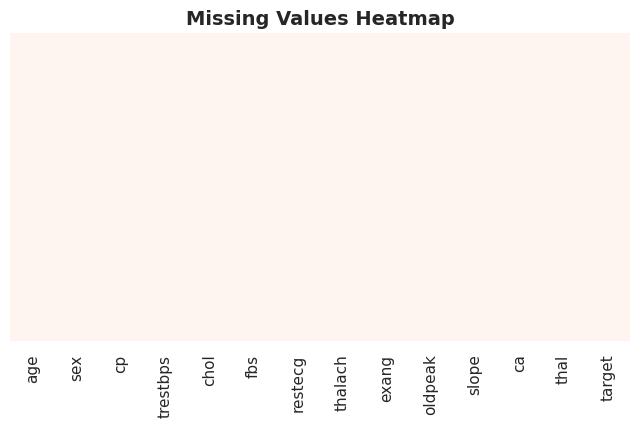


💓 Target Distribution


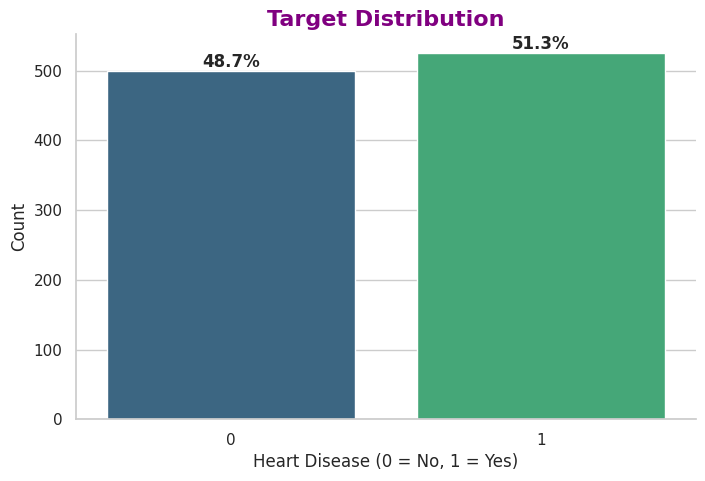

In [81]:

from tabulate import tabulate
from termcolor import colored

# Load data
df = pd.read_csv('heart.csv')

# Header
print(colored("="*70, 'cyan', attrs=['bold']))
print(colored(" HEART DISEASE DATASET - EXPLORATORY DATA ANALYSIS ", 'white', 'on_blue', attrs=['bold']))
print(colored("="*70, 'cyan', attrs=['bold']))

# Shape
print(colored("\n📏 Dataset Shape:", 'yellow', attrs=['bold']), f"{df.shape[0]} rows × {df.shape[1]} columns")

# Preview table
print(colored("\n🔍 First 5 Rows of Data", 'green', attrs=['bold']))
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

# Info
print(colored("\nℹ️ Dataset Info", 'blue', attrs=['bold']))
df_info = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum(),
    "Dtype": df.dtypes
})
print(tabulate(df_info, headers='keys', tablefmt='fancy_grid'))

# Describe
print(colored("\n📊 Statistical Summary", 'magenta', attrs=['bold']))
print(tabulate(df.describe().round(2), headers='keys', tablefmt='fancy_grid'))

# Missing Values
print(colored("\n❓ Missing Values Per Column", 'red', attrs=['bold']))
missing_df = pd.DataFrame({"Column": df.columns, "Missing Values": df.isnull().sum()})
print(tabulate(missing_df, headers='keys', tablefmt='fancy_grid'))

# Missing Value Heatmap
print(colored("\n🔥 Missing Values Heatmap", 'yellow', attrs=['bold']))
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='Reds')
plt.title("Missing Values Heatmap", fontsize=14, fontweight='bold')
plt.show()

# Target Distribution
target_col = 'target'
print(colored("\n💓 Target Distribution", 'cyan', attrs=['bold']))
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x=target_col,
    hue=target_col,
    data=df,
    palette="viridis",
    legend=False
)

# Add percentages above bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Target Distribution", fontsize=16, fontweight='bold', color='purple')
plt.xlabel("Heart Disease (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
sns.despine()
plt.show()


**Data Pre-Processing**

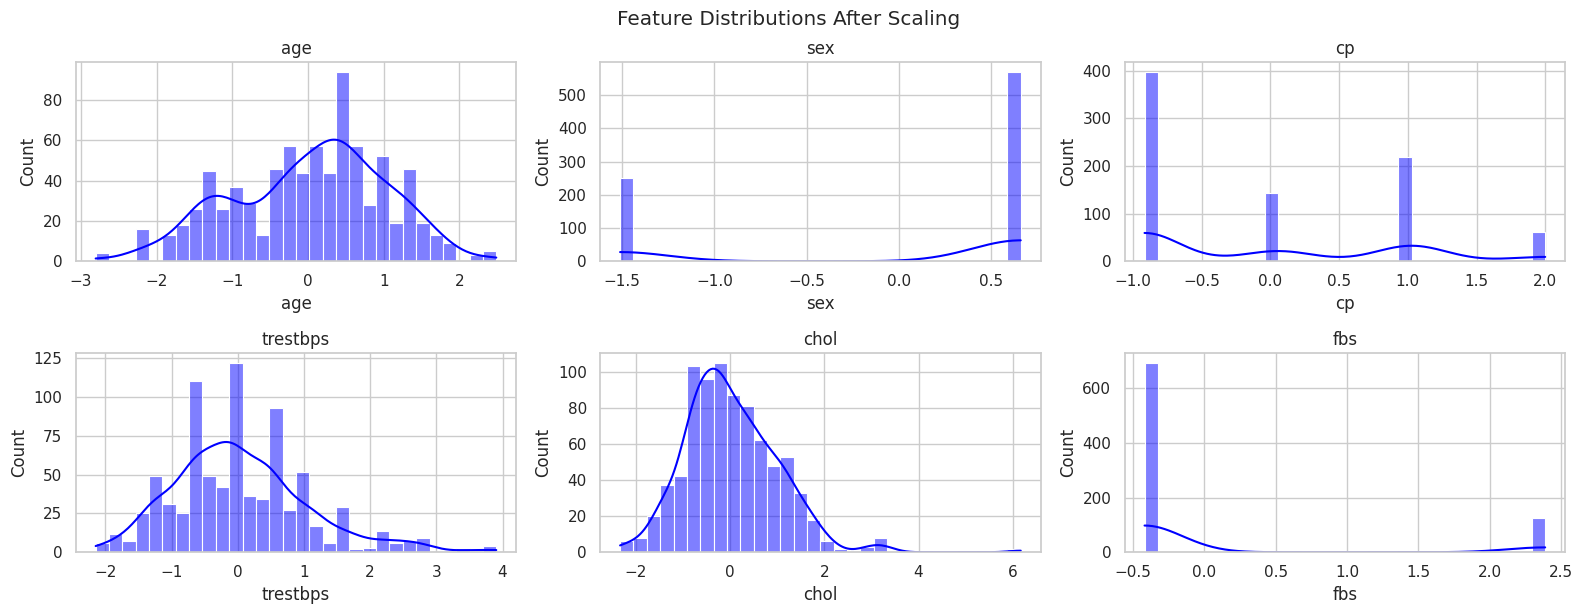

/tmp/ipython-input-1029683619.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Blues')


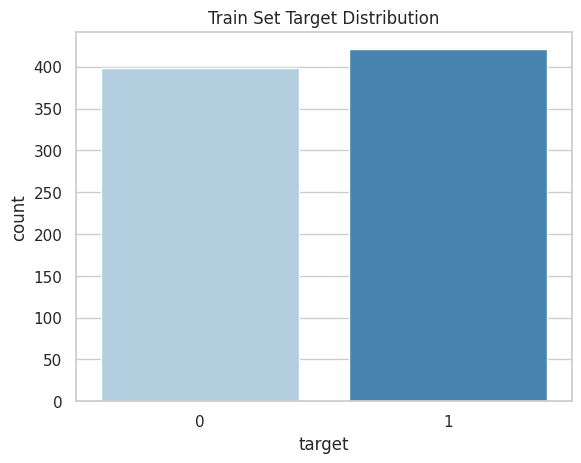

/tmp/ipython-input-1029683619.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Greens')


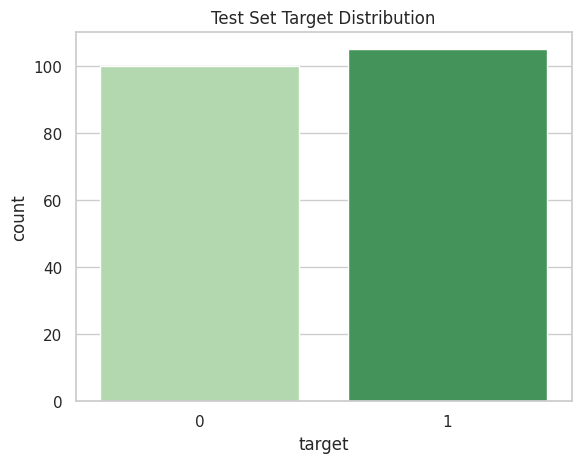

In [82]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
#this will find all columns with 'object' data type

label_encoders = {}
for col in cat_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col].astype(str))
  label_encoders[col] = le


feature_cols = [col for col in df.columns if col != 'target']
#it takes all columns except the 'target'column

scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])
#scaling the values

#spliting data set for training and testing
X = df.drop('target',axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

plt.figure(figsize=(16,6))
for i,col in enumerate(feature_cols[:6]):
  plt.subplot(2,3,i+1)  #creating a 2*3 histogram for 6 features one by one cause i will start at i=0
  sns.histplot(X_train[col],kde=True,bins=30,color='blue')
  plt.title(col)

plt.tight_layout()
plt.suptitle("Feature Distributions After Scaling ",y=1.02)
plt.show()

# 5. Show class balance after split
sns.countplot(x=y_train, palette='Blues')
plt.title("Train Set Target Distribution")
plt.show()
sns.countplot(x=y_test, palette='Greens')
plt.title("Test Set Target Distribution")
plt.show()

In [83]:
print(X_train.head())

          age       sex        cp  trestbps      chol       fbs   restecg  \
4    0.834359 -1.511706 -0.915755  0.364875  0.930822  2.387330  0.891255   
688  0.172682 -1.511706 -0.915755  3.906079  0.814469  2.387330 -1.004049   
477  0.282961  0.661504  1.027618 -0.206287 -0.329666 -0.418878 -1.004049   
336  0.282961  0.661504  1.027618  1.050269 -2.327054  2.387330  0.891255   
960 -0.268437 -1.511706  1.027618  0.250643 -0.969606 -0.418878 -1.004049   

      thalach     exang   oldpeak     slope        ca      thal  
4   -1.874977 -0.712287  0.705408 -0.624121  2.179817 -0.522122  
688 -0.700783  1.403928  2.493434 -2.243675  1.209221  1.089852  
477  0.038525 -0.712287 -0.571753 -0.624121  0.238625  1.089852  
336  1.038764 -0.712287 -0.742041  0.995433  0.238625  1.089852  
960  0.864809 -0.712287 -0.827185 -0.624121 -0.731971 -0.522122  


# **Decision-Trees**

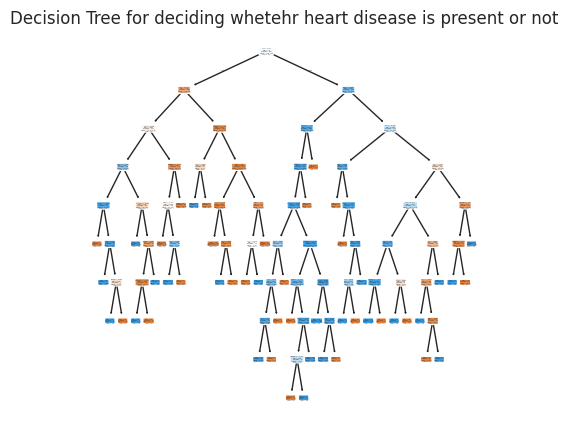

In [84]:
ctree = DecisionTreeClassifier(random_state = 55 )
ctree.fit(X_train,y_train)

plt.figure(figsize=(5,5))
plot_tree(
    ctree,
    feature_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"],
    class_names = ["No","Yes"],
    filled=True, #used for coloring the nodes based on depth
    rounded=True #to make the boxes rounded
)
plt.title("Decision Tree for deciding whetehr heart disease is present or not")
plt.show()

Classificatin Tree Accuracy(Training) :-  1.0
Classificatin Tree Accuracy(Testing) :-  0.9853658536585366
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



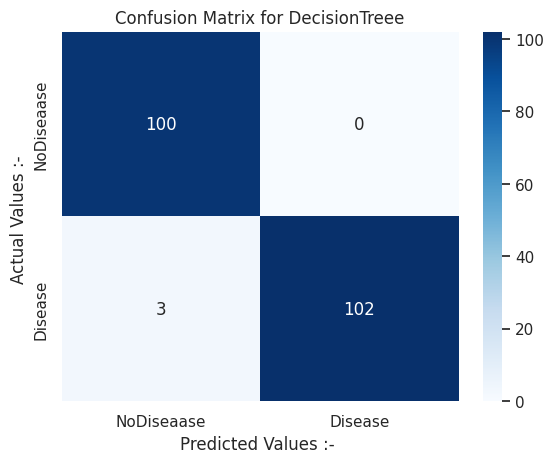

In [85]:
predict_ctree = ctree.predict(X_train)
ctree_accuracy = accuracy_score(y_train,predict_ctree)

print("Classificatin Tree Accuracy(Training) :- ",ctree_accuracy)
#reusing variables as this was just for display
predict_ctree = ctree.predict(X_test)
ctree_accuracy = accuracy_score(y_test,predict_ctree)

print("Classificatin Tree Accuracy(Testing) :- ",ctree_accuracy)

print("Classification Report (Test):\n", classification_report(y_test, predict_ctree))

conf_mat = confusion_matrix(y_test,predict_ctree)
sns.heatmap(
    conf_mat,
    annot=True,
    fmt = "d",
    cmap = "Blues",
    xticklabels = ["NoDiseaase","Disease"],
    yticklabels = ["NoDiseaase","Disease"]
)
plt.title("Confusion Matrix for DecisionTreee")
plt.xlabel("Predicted Values :- ")
plt.ylabel("Actual Values :- ")
plt.show()

**Testing Training and Testing accuracy scores with varying depth value**

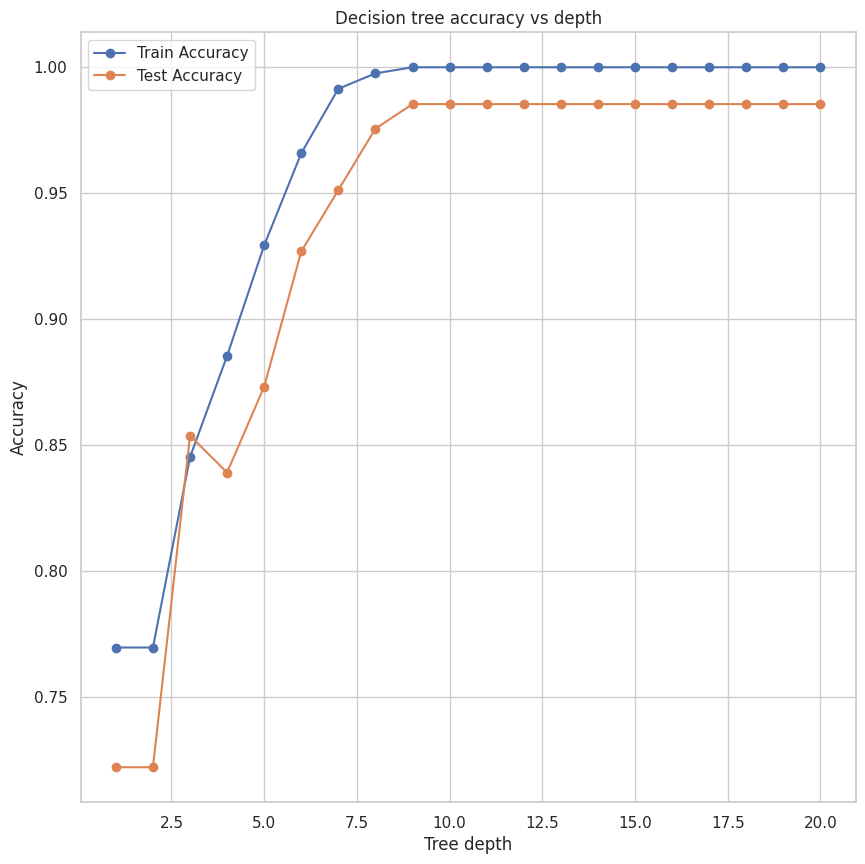

9


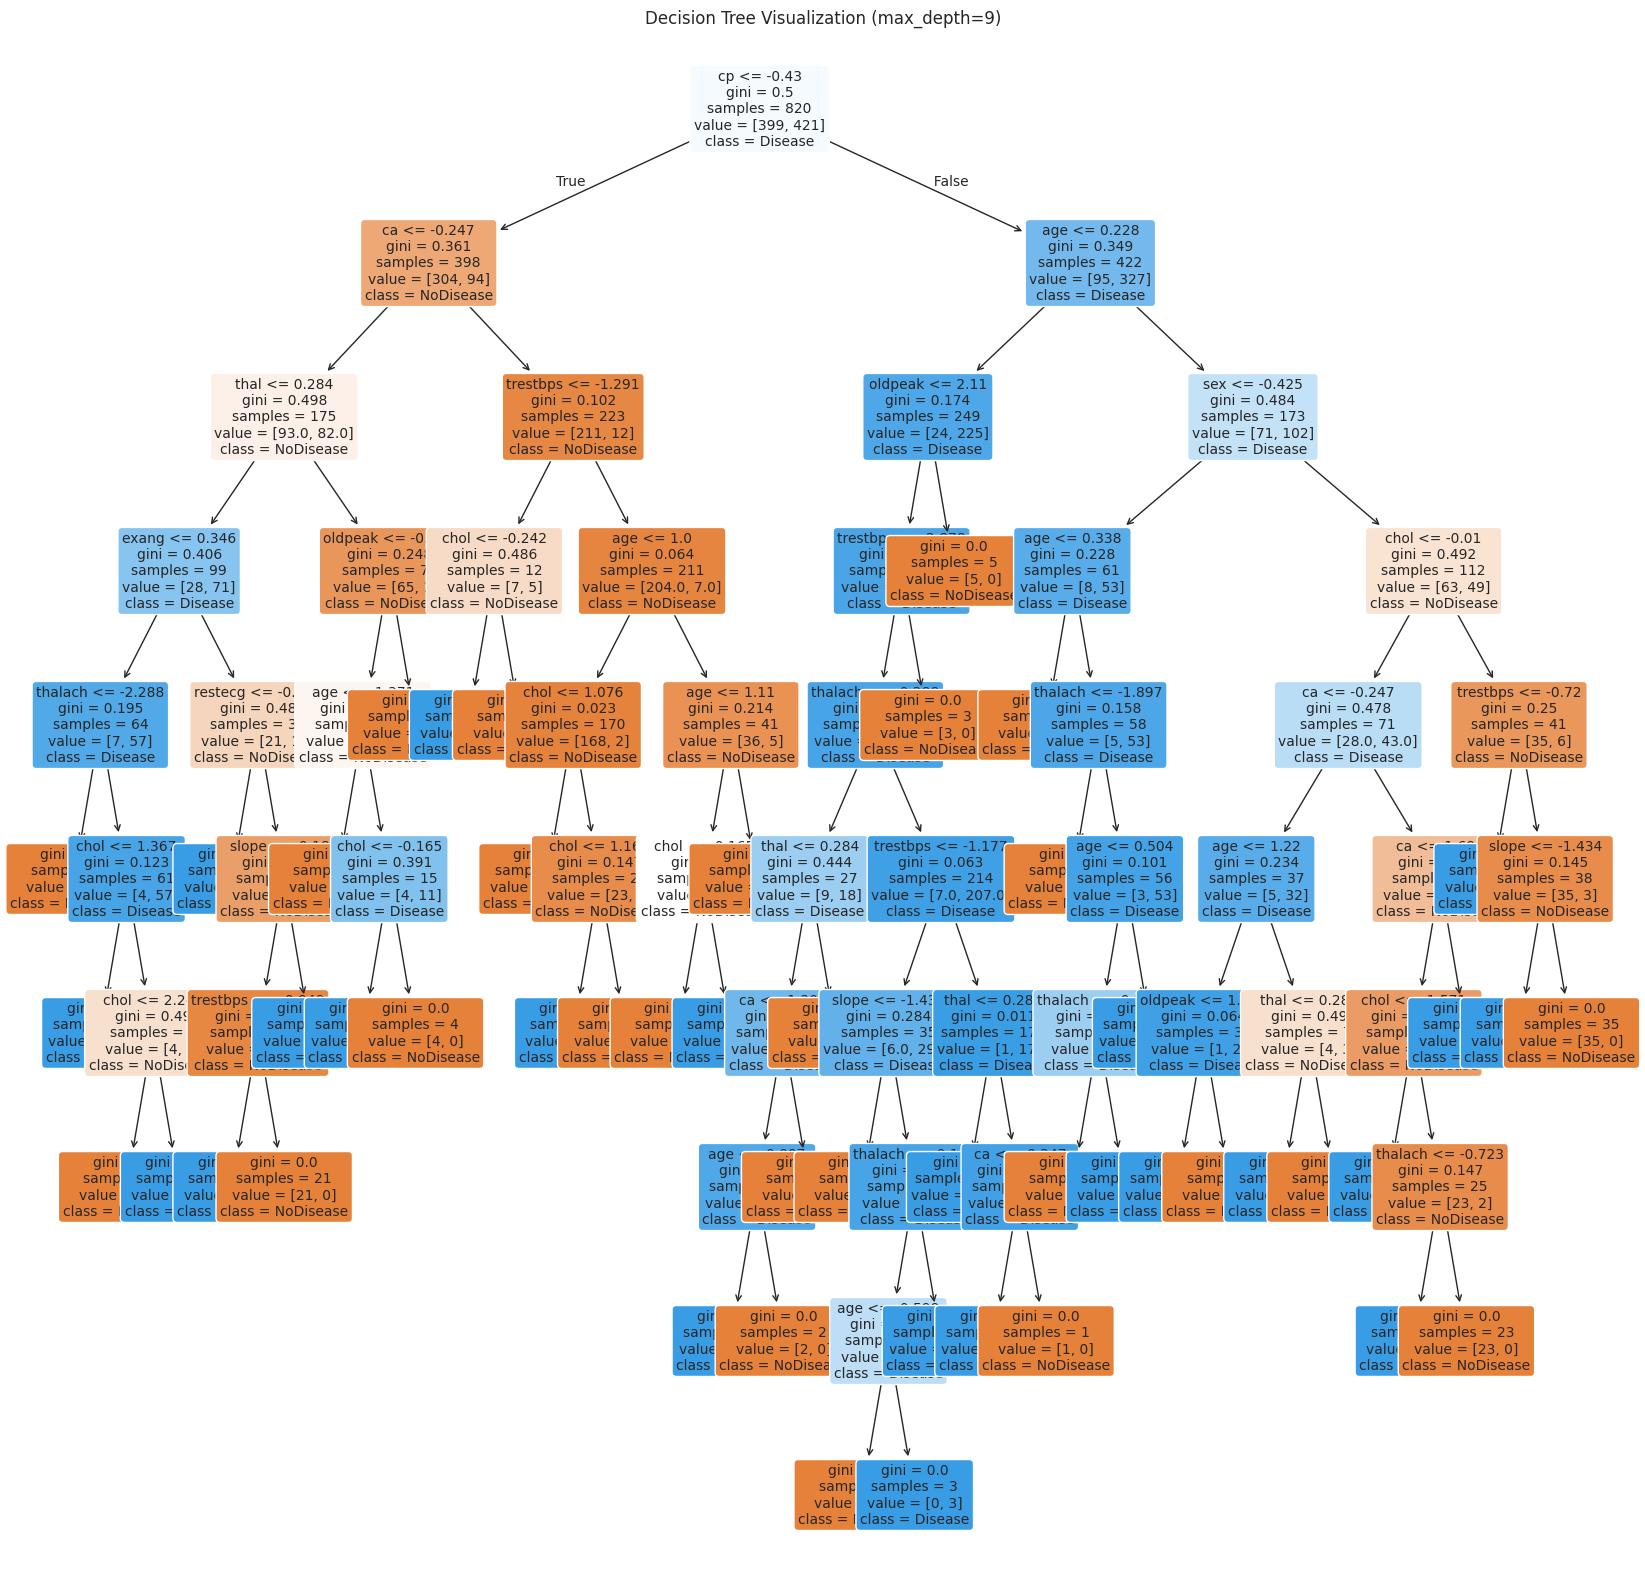

In [86]:
depth_range = range(1,21)

#defining to variables to store accuracy scores for each training and testing accurcaies
train_ac = []
test_ac = []

for d in depth_range:
  dtree = DecisionTreeClassifier(max_depth=d,random_state=56)
  dtree.fit(X_train,y_train)
  train_ac.append(dtree.score(X_train,y_train))
  test_ac.append(dtree.score(X_test,y_test))

plt.figure(figsize=(10,10))
plt.plot(depth_range,train_ac,label="Train Accuracy",marker='o')
plt.plot(depth_range,test_ac,label="Test Accuracy",marker='o')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.title("Decision tree accuracy vs depth")
plt.legend()
plt.show()

#finding the tree which has maximum accuracy in testing data
max_accu = max(test_ac)
max_index = test_ac.index(max_accu) + 1
print(max_index)
dtree_best = DecisionTreeClassifier(max_depth = max_index,random_state=54)
dtree_best.fit(X_train,y_train)
plt.figure(figsize=(20,20))
plot_tree(dtree_best,feature_names=X_train.columns, class_names=['NoDisease', 'Disease'], filled=True, rounded=True, fontsize=10)
plt.title(f"Decision Tree Visualization (max_depth={max_index})")
plt.show()

**RANDOM-FOREST CLASSIFIER**

In [87]:
forest1 = RandomForestClassifier(
    n_estimators=100,
    random_state=44,
    n_jobs=-1
    )
#n_estimators = 100 means it will have 100 trees
#n_jobs is the number of cpus used -1 means use all available cpus
forest1.fit(X_train,y_train)

#making predictions using both train and test datasets
y_train_forest1 = forest1.predict(X_train) #predicted values from X_train through forest1
y_test_forest1 = forest1.predict(X_test) #predicted values from X_test through forest1

#comapring accuracies of both preedictions
print("Random Forest Accuracy for Train Dataset")
print(accuracy_score(y_train,y_train_forest1))
print("Random Forest Accuracy for Test Dataset")
print(accuracy_score(y_test,y_test_forest1))
print("Classification Report for Test set")
print(classification_report(y_test,y_test_forest1))

Random Forest Accuracy for Train Dataset
1.0
Random Forest Accuracy for Test Dataset
1.0
Classification Report for Test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



**Confusion matrix for test predictions**

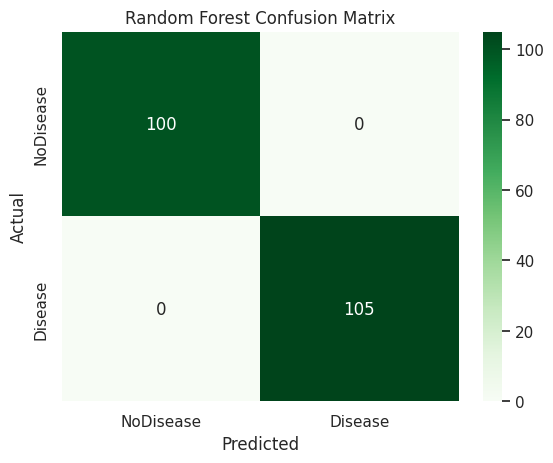

In [88]:
conf_matrix_rf = confusion_matrix(y_test,y_test_forest1)
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=['NoDisease', 'Disease'],
    yticklabels=['NoDisease', 'Disease']
)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Visualizing Feature Importance**

/tmp/ipython-input-1638122681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp_features.values,y=imp_features.index,palette="viridis")


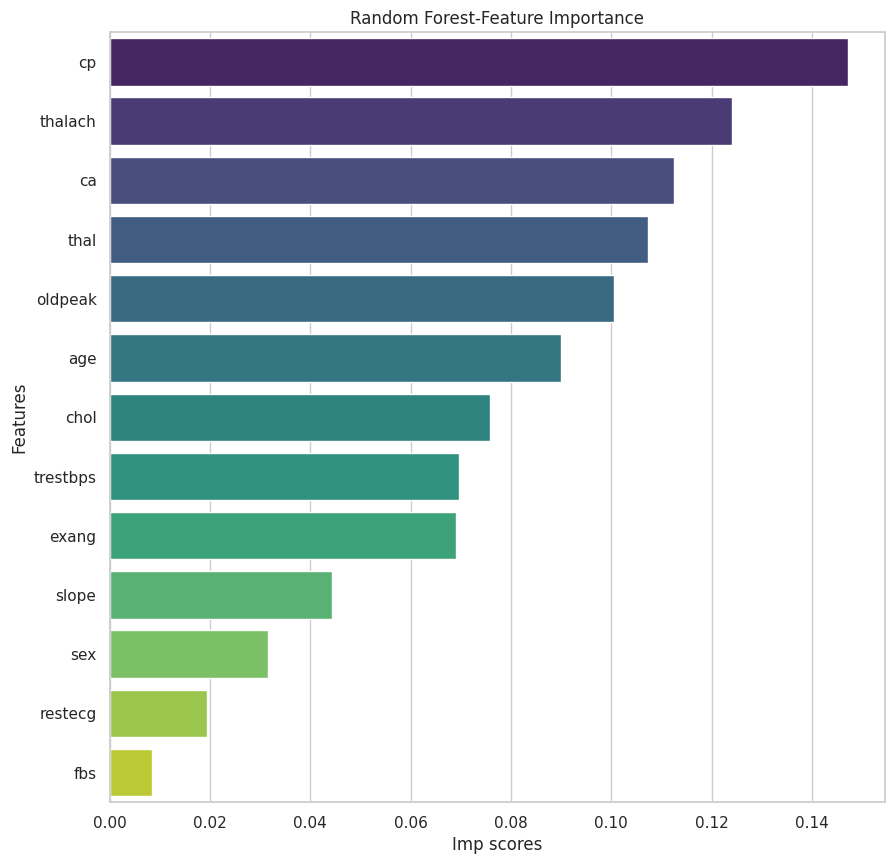

In [89]:
imp = forest1.feature_importances_
imp_features = pd.Series(imp,index=X_train.columns)
imp_features = imp_features.sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(x=imp_features.values,y=imp_features.index,palette="viridis")
plt.title("Random Forest-Feature Importance")
plt.xlabel("Imp scores")
plt.ylabel("Features")
plt.show()

**Evaluating using cross-validation.**

/tmp/ipython-input-1111604070.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='mako')


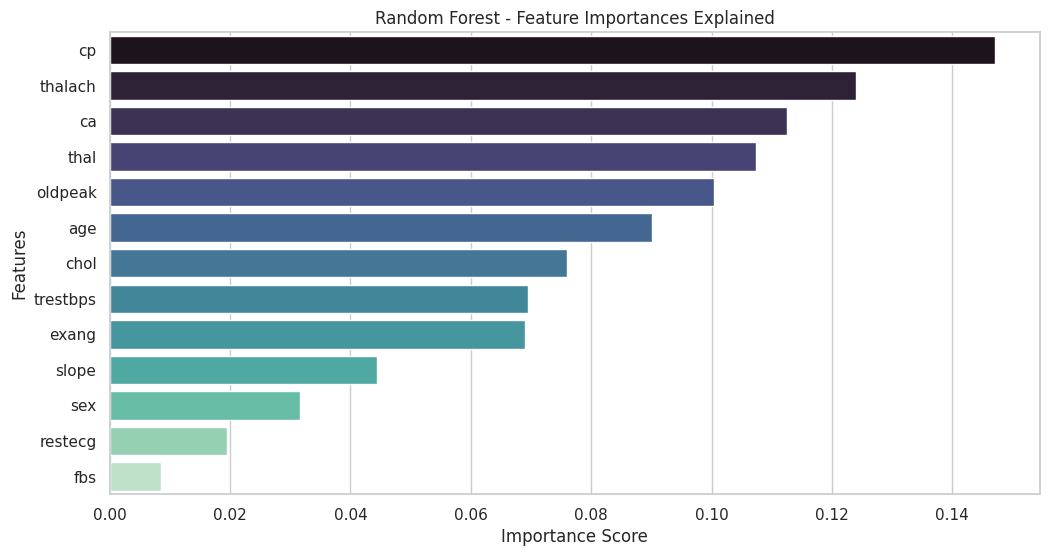

Decision Tree CV Accuracy: Mean=0.9932, Std=0.0137
Random Forest CV Accuracy: Mean=0.9961, Std=0.0078


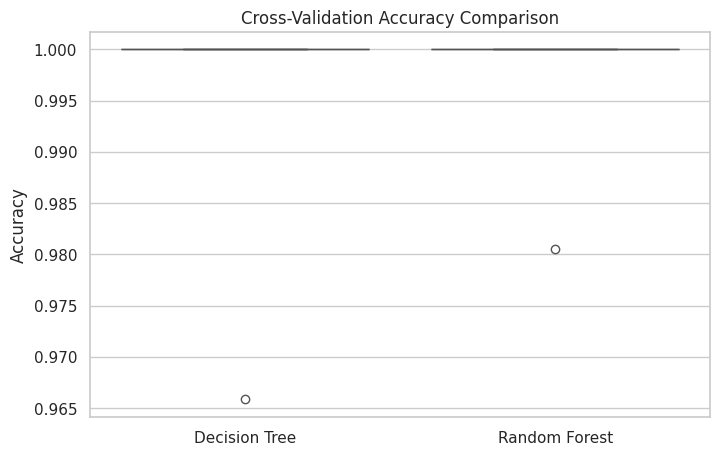

In [90]:
from sklearn.model_selection import cross_val_score

# 1. Feature Importance Deep-Dive (Random Forest)
feat_importances = pd.Series(forest1.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='mako')
plt.title("Random Forest - Feature Importances Explained")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 2. Cross-Validation Setup & Scoring
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=best_depth, random_state=42),
                               X, y, cv=cv, scoring='accuracy')
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),
                               X, y, cv=cv, scoring='accuracy')

# 3. Display Cross-Val Results
print(f"Decision Tree CV Accuracy: Mean={dt_cv_scores.mean():.4f}, Std={dt_cv_scores.std():.4f}")
print(f"Random Forest CV Accuracy: Mean={rf_cv_scores.mean():.4f}, Std={rf_cv_scores.std():.4f}")

# 4. Visualization of CV accuracy distributions
cv_df = pd.DataFrame({
    'Decision Tree': dt_cv_scores,
    'Random Forest': rf_cv_scores
})

plt.figure(figsize=(8, 5))
sns.boxplot(data=cv_df, palette='muted')
plt.title("Cross-Validation Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [91]:
comparison_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Test Accuracy": [dt_cv_scores, rf_cv_scores],
    "CV Mean Accuracy": [dt_cv_scores.mean(), rf_cv_scores.mean()],
    "Best Params": [f"Max Depth = {best_depth}", "Default"]
})
display(comparison_df)


,Model,Test Accuracy,CV Mean Accuracy,Best Params
0,Decision Tree,"[1.0, 1.0, 1.0, 0.9658536585365853, 1.0]",0.993171,Max Depth = 9
1,Random Forest,"[1.0, 1.0, 1.0, 0.9804878048780488, 1.0]",0.996098,Default


In [92]:
sample_data = X_test.sample(5, random_state=7)
predictions = forest1.predict(sample_data)
probabilities = forest1.predict_proba(sample_data)

results_df = pd.DataFrame({
    "Sample Index": sample_data.index,
    "Prediction": predictions,
    "Prob_NoDisease": probabilities[:,0],
    "Prob_Disease": probabilities[:,1]
})
display(results_df)


,Sample Index,Prediction,Prob_NoDisease,Prob_Disease
0,913,1,0.08,0.92
1,110,0,0.78,0.22
2,137,1,0.07,0.93
3,286,1,0.16,0.84
4,163,0,0.91,0.09
